# Programa 1. Programación de Método de Gauss-Jordan y despliegue de gráficas con intersecciones.

El programa debe ser capaz de resolver al menos sistemas con dos incógnitas y con tres incógnitas.
Una vez ingresados los datos al programa. Se deberá desplegar paso por paso la creación de la matriz escalonado-reducida.
Una vez que se llegó a la forma escalonada reducida, el programa indicará los resultados para cada variable.
Además, deberá de graficar las líneas rectas o planos (2 incógnitas, 3 incógnitas respectivamente) que se producen con las ecuaciones que se ingresen al programa. En el caso de que exista una única solución, deberán remarcar con un punto en la gráfica en donde se encuentra esta intersección.


#### Funciones y método auxiliares para solucionar una matriz mxn.

In [26]:
# Bibliotecas
import fpformat

# Generado de la matriz
def generador(x,y):
    mat = []
    for k in range(x):
        mat.append([])
    for i in range(x):
        for j in range(y+1):
            print
            mat[i].append(error_test(raw_input("a_" + str(i+1) + str(j+1) + " = "), 2))
    return mat

# Despliega matriz
def impri(m):
    print "\n"
    print "\t||" + ("\t" * (len(m[0]) + 1)) + "||"
    for i in range(len(m)):
        print "\t||\t",
        for j in range(len(m[0])):
            print fpformat.fix(m[i][j],2),"\t",
        print "||"
        print "\t||" + ("\t" * (len(m[0]) + 1)) + "||"
    print "\n"

# Escoger valor minimo
def peque(a,b):
    if a > b:
        return b
    elif a < b:
        return a
    else:
        return a

# Sumador de listas
def adic(l1, l2):
    ln = [0]*len(l1)
    for i in range(len(l1)):
        ln[i] = l1[i] + l2[i]
    return ln

# Multiplicador por constante
def multi(l1, k):
    ln = [0]*len(l1)
    for i in range(len(l1)):
        ln[i] = k * l1[i]
    return ln

# Buscador y cambiador de filas
def swap_finder(m, l, x):
    if l == (x-1):
        print "La matriz es inconsistente."
        print "Eso implica que no se puede resolver.\n\n"
        return m, False
    else:
        for i in range(l, x):
            if m[i][l] != 0:
                m[l], m[i] = m[i], m[l]
                print ("cambia fila ", l+1 , "por", i+1)
                return m, True
        print "La matriz es inconsistente."
        print "Eso implica que no se puede resolver.\n\n"
        return m, False
    
# Sistema de resolucion Gauss-Jordan
def solver(mat,p):
    m = list(mat)
    for i in range(p):
        boo = True
        if m[i][i] == 0:
            m, boo = swap_finder(m, i, p)
        if boo: #and float(m[i][i]) <> float(1.0):
            print ("divide fila", i+1, "por pivote", m[i][i])
            m[i] = multi(m[i], 1/float(m[i][i]))
            impri(m)
        else:
            return m
        for j in range(i+1,len(m)):
            print ("Fila ", j+1 , " <-- fila", i+1, "*-", float(m[i][i]))
            m[j] = adic(m[j], multi(m[i], -1*float(m[j][i])))
        impri(m)
    for k in range(p-1, -1, -1):
        print ("Elementos de columnas pivote a ceros")
        for l in range(k-1, -1, -1):
            m[l] = adic(m[l], multi(m[k], -1*float(m[l][k])))

        impri(m)
    return m

def error_test2(x):
    try:
        int(x)
        return False
    except:
        return True

# Revision del dato ingresado (entero)
def error_test3(x):
    try:
        float(x)
        return False
    except:
        return True

# Revision general
def error_test(y, z=1):
    if z == 1:
        while error_test2(y):
            print "\n\n\t\tERROR!!!\n\t\tSe han ingresado valores o caracteres no validos."
            y = raw_input("\n\nPor favor, reingrese el valor deseado: ")
        return int(y)
    elif z == 2:
        while error_test3(y):
            print "\n\n\t\tERROR!!!\n\t\tSe han ingresado valores o caracteres no validos."
            y = raw_input("\n\nPor favor, reingrese el valor deseado: ")
        return float(y)

#### Primeramente ocupamos saber si la ecuación va ser de 2 o 3 incógnitas.

In [22]:
dimx = 0
dimy = 0
mini = 0

dimx = error_test(raw_input("Ingrese la cantidad de incognitas: "), 1)
dimy = dimx

Ingrese la cantidad de incognitas: 2


#### Una vez obteniendo el número de incógnitas sabemos de que tamaño va ser la matriz nxm y el siguiente paso vamos a solicitar al usuario ingresar los datos para la matriz A.

In [23]:
matriz = generador(dimx, dimy)
original_m = matriz
impri(matriz)


a_11 = 1

a_12 = 2

a_13 = 3

a_21 = 4

a_22 = 5

a_23 = 6


	||				||
	||	1.00 	2.00 	3.00 	||
	||				||
	||	4.00 	5.00 	6.00 	||
	||				||




#### Al terminar la captura de datos de la matriz A, se va resolver paso a paso a trávez del método de Gauss-Jordan obteniendo los valores indicados para el vector de incógnitas si se encuentra la única solución; en caso contrario puede tener infinita soluciones o ninguna.

In [29]:
mini = peque(dimx, dimy)
solucion = solver(matriz, mini)
print "\t\t*** Solucion ***"
impri(solucion)

('divide fila', 1, 'por pivote', 1.0)


	||				||
	||	1.00 	2.00 	3.00 	||
	||				||
	||	4.00 	5.00 	6.00 	||
	||				||


('Fila ', 2, ' <-- fila', 1, '*-', 1.0)


	||				||
	||	1.00 	2.00 	3.00 	||
	||				||
	||	0.00 	-3.00 	-6.00 	||
	||				||


('divide fila', 2, 'por pivote', -3.0)


	||				||
	||	1.00 	2.00 	3.00 	||
	||				||
	||	-0.00 	1.00 	2.00 	||
	||				||




	||				||
	||	1.00 	2.00 	3.00 	||
	||				||
	||	-0.00 	1.00 	2.00 	||
	||				||


Elementos de columnas pivote a ceros


	||				||
	||	1.00 	0.00 	-1.00 	||
	||				||
	||	-0.00 	1.00 	2.00 	||
	||				||


Elementos de columnas pivote a ceros


	||				||
	||	1.00 	0.00 	-1.00 	||
	||				||
	||	-0.00 	1.00 	2.00 	||
	||				||


		*** Solucion ***


	||				||
	||	1.00 	0.00 	-1.00 	||
	||				||
	||	-0.00 	1.00 	2.00 	||
	||				||




### Para gráficar las ecuaciones necesitamos las siguientes bibliotecas.

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#### Funciones y método auxiliares para solucionar una gráficar un plano cartesiano o en un plano tridimensional.

In [19]:
def graph(equation, x_range):  
    x1 = np.array(x_range)  
    x2 = np.array(x_range)
    y = eval(equation)
    plt.plot(x1, y)

def graph3d(mat, i, x_range, y_range, ax, color):
    X, Y = np.meshgrid(x_range, y_range)
    z = (mat[i][0]*X + mat[i][1]*Y+mat[i][2])/mat[i][3]    
    ax.plot_surface(X,Y,z,color=color,alpha=.5, linewidth=0, zorder=-1)
    
    
    
def get_equation(mat, i):
    return '('+fpformat.fix(mat[i][0],2)+')*x1+('+fpformat.fix(mat[i][1],2)+')*x2+('+ fpformat.fix(mat[i][2],2) + ')'   

#### Con la ayuda de matplotlib podemos graficar de manera fácil con solo enviando un vector en las ejes de X, Y y/o Z.

(1.00)*x1+(2.00)*x2+(3.00)
(4.00)*x1+(5.00)*x2+(6.00)


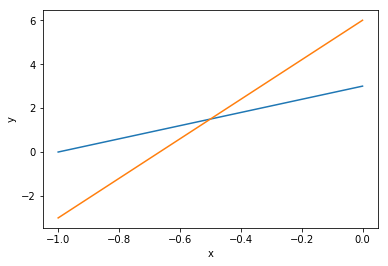

In [30]:
if dimx == 2:
    for i in range(0, dimx):
        equation = get_equation(matriz, i)
        print equation
        graph(equation, range(-1, 1))

elif dimx == 3:
    fig = plt.figure()
    ax = fig.gca(projection='3d') 
    color = ['r', 'g', 'b']
    for i in range(0, dimx):
        graph3d(matriz, i, range(-1, 1), range(-1, 1), ax, color[i])
        
plt.xlabel('x');
plt.ylabel('y');
plt.show();

#### Gracias por su atención

Integrantes: <br />
Cardenas Piñuelas Jesus Carlos <br />
Chavez Ochoa Edwin Julian <br />
Girón Vázquez Alejandra Jocelyn <br />
Vanegas Pérez Iván Darío <br />
Zheng Wu Juan <br />